In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file_data = pd.read_excel('/content/gdrive/My Drive/data.xlsx')
file_data.tail()

,bed_code,branch_code,room_size,sex,gu,dong,deposite,month_bill,subway_dist,bus_dist,uni-dist,hospital,pharmacy,gym,library,police,park,rate
907,164M1,164,1,혼성,성동구,성수동1가,5000000,570000,0.272437,168.197664,1.758763,1.250308,0.51988,1.062654,0.158419,0.621789,0.324078,1.0
908,165A1,165,1,여성,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
909,165B1,165,1,여성,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
910,165C1,165,2,여성,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
911,165C2,165,2,여성,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0


In [4]:
file_data['sex'] = file_data['sex'].str.replace('여성', '2')
file_data['sex'] = file_data['sex'].str.replace('혼성', '1')
file_data['sex'] = file_data['sex'].str.replace('남성', '0')
file_data.tail()

,bed_code,branch_code,room_size,sex,gu,dong,deposite,month_bill,subway_dist,bus_dist,uni-dist,hospital,pharmacy,gym,library,police,park,rate
907,164M1,164,1,1,성동구,성수동1가,5000000,570000,0.272437,168.197664,1.758763,1.250308,0.51988,1.062654,0.158419,0.621789,0.324078,1.0
908,165A1,165,1,2,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
909,165B1,165,1,2,중구,장충동2가,1100000,470000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
910,165C1,165,2,2,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0
911,165C2,165,2,2,중구,장충동2가,860000,350000,0.433619,173.102839,0.274396,1.913166,1.82018,1.865206,1.643244,1.545820,0.849624,0.0


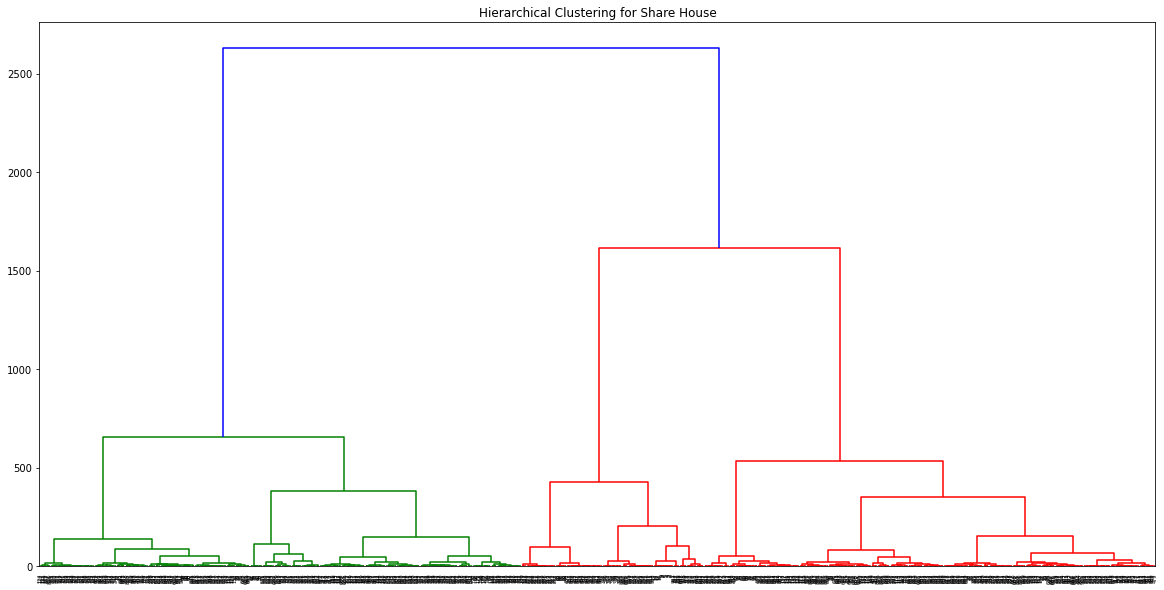

In [14]:
data = file_data.iloc[:, [8,9,10,11,12,13,14,15,16,17]].values
import scipy.cluster.hierarchy as shc



plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering for Share House") 
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,

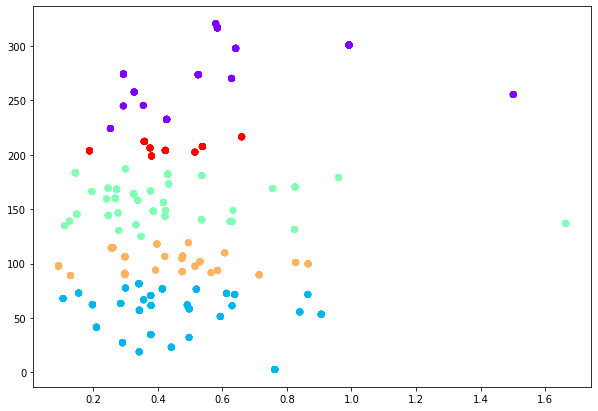

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')